In [1]:
#LSTM for regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
dataframe = pd.read_excel('data_export.xlsx')

In [3]:
dataframe

,Tên_mặt_hàng,Đơn_vị_tính,Loại_giá,Loại_tiền,Ngày,Giá
0,Cà phê Robusta nhân xô,VNĐ/kg,Thu mua,VNĐ,2021-01-01,31667.5
1,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-04,32717.0
2,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-05,32417.0
3,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-06,32317.0
4,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2021-01-07,32117.0
...,...,...,...,...,...,...
619,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-15,55566.5
620,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-16,56066.5
621,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-17,56666.5
622,Cà phê Robusta nhân xô,Vnđ/kg,Thu mua,VNĐ,2023-05-18,57000.0


In [4]:
dataframe['Giá'].astype(float)

0      31667.5
1      32717.0
2      32417.0
3      32317.0
4      32117.0
        ...   
619    55566.5
620    56066.5
621    56666.5
622    57000.0
623    57500.0
Name: Giá, Length: 624, dtype: float64

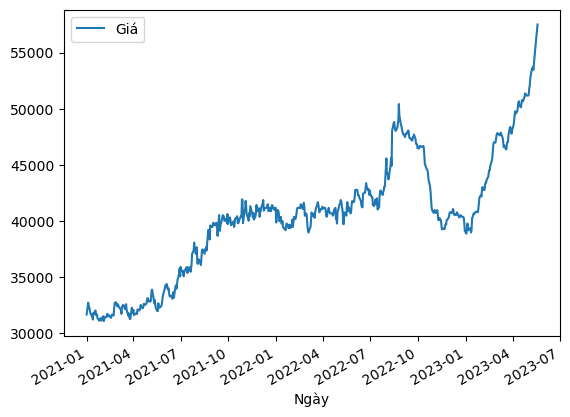

In [5]:
dataframe.plot(x = 'Ngày', y = 'Giá')
plt.show()

In [6]:
dataframe.drop(dataframe.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)

In [7]:
dataframe

,Giá
0,31667.5
1,32717.0
2,32417.0
3,32317.0
4,32117.0
...,...
619,55566.5
620,56066.5
621,56666.5
622,57000.0


In [8]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataframe.values)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

436 188


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(434, 1, 1)
(434,)
(186, 1, 1)
(186,)


In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
434/434 - 2s - loss: 0.0438 - 2s/epoch - 5ms/step
Epoch 2/100
434/434 - 1s - loss: 0.0172 - 603ms/epoch - 1ms/step
Epoch 3/100
434/434 - 1s - loss: 0.0093 - 667ms/epoch - 2ms/step
Epoch 4/100
434/434 - 1s - loss: 0.0036 - 611ms/epoch - 1ms/step
Epoch 5/100
434/434 - 1s - loss: 9.2775e-04 - 509ms/epoch - 1ms/step
Epoch 6/100
434/434 - 1s - loss: 4.3623e-04 - 552ms/epoch - 1ms/step
Epoch 7/100
434/434 - 1s - loss: 3.9510e-04 - 566ms/epoch - 1ms/step
Epoch 8/100
434/434 - 1s - loss: 3.9223e-04 - 658ms/epoch - 2ms/step
Epoch 9/100
434/434 - 1s - loss: 4.0561e-04 - 751ms/epoch - 2ms/step
Epoch 10/100
434/434 - 1s - loss: 4.0442e-04 - 699ms/epoch - 2ms/step
Epoch 11/100
434/434 - 1s - loss: 3.9514e-04 - 669ms/epoch - 2ms/step
Epoch 12/100
434/434 - 1s - loss: 4.0075e-04 - 721ms/epoch - 2ms/step
Epoch 13/100
434/434 - 1s - loss: 3.9445e-04 - 782ms/epoch - 2ms/step
Epoch 14/100
434/434 - 1s - loss: 4.0151e-04 - 653ms/epoch - 2ms/step
Epoch 15/100
434/434 - 1s - loss: 3.9645e-04 - 7

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

6/6 [==============================] - 0s 2ms/step


In [17]:
def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = sklearn.metrics.mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))

In [20]:
# calculate metrics
print('\nRMSE')
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('\nMAE')
trainScore = sklearn.metrics.mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = sklearn.metrics.mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
print('\nMAPE')                          
trainScore = sklearn.metrics.mean_absolute_percentage_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAPE' % (trainScore))
testScore = sklearn.metrics.mean_absolute_percentage_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAPE' % (testScore))
print('\nMASE')
trainScore = mean_absolute_scaled_error(trainY[0], trainPredict[:,0], trainY[0])
print('Train Score: %.2f MASE' % (trainScore))
testScore = mean_absolute_scaled_error(testY[0], testPredict[:,0], testY[0])
print('Test Score: %.2f MASE' % (testScore))


RMSE
Train Score: 511.90 RMSE
Test Score: 566.64 RMSE

MAE
Train Score: 359.00 MAE
Test Score: 388.07 MAE

MAPE
Train Score: 0.01 MAPE
Test Score: 0.01 MAPE

MASE
Train Score: 1.05 MASE
Test Score: 1.53 MASE


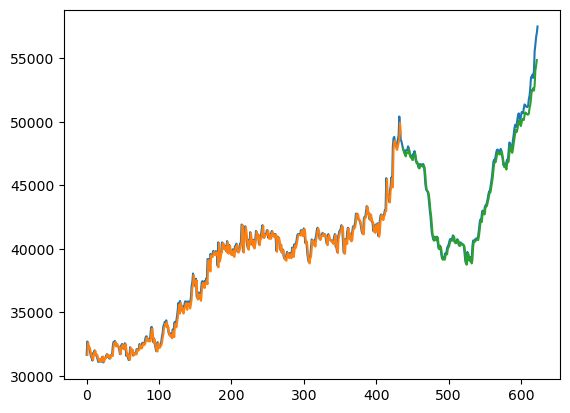

In [21]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()